<a href="https://colab.research.google.com/github/Vimal9900/College-Work/blob/main/Vimal_Kumar_Verma_(M24MAC015)_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

(195, 24)
Performance without PCA:
Mean Squared Error: 0.0000
R² Score: 0.9949

Performance with PCA:
Mean Squared Error: 0.0000
R² Score: 0.9958


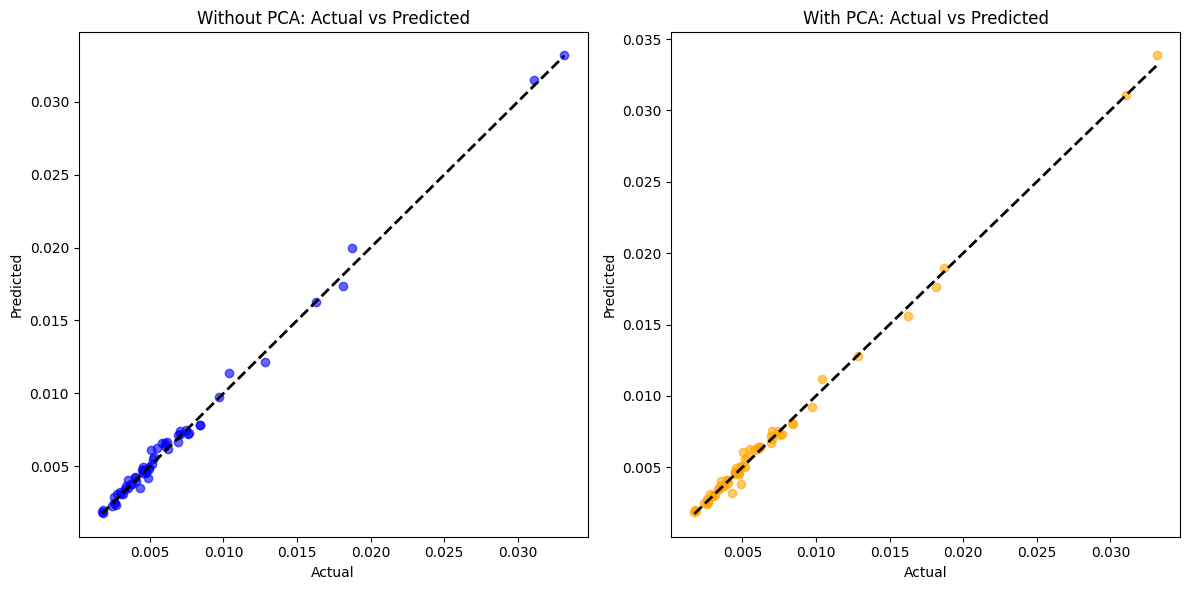

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the UCI Parkinson's dataset from a URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)
print(data.shape)
# Features (excluding 'name' and 'status', 'name' is an identifier, 'status' is for classification)
X = data.drop(columns=['name', 'status'])

# Use one of the continuous features as the target variable for regression (e.g., 'Jitter(%)')
y = X['MDVP:Jitter(%)']  # Target variable
X = X.drop(columns=['MDVP:Jitter(%)'])  # Exclude the target from the features

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Standardize the features (PCA and Linear Regression benefit from standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression without PCA
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_no_pca = lr.predict(X_test_scaled)

# Calculate metrics without PCA
mse_no_pca = mean_squared_error(y_test, y_pred_no_pca)
r2_no_pca = r2_score(y_test, y_pred_no_pca)

print(f"Performance without PCA:")
print(f"Mean Squared Error: {mse_no_pca:.4f}")
print(f"R² Score: {r2_no_pca:.4f}")

# Apply PCA (let's reduce to 13 principal components)
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Linear Regression with PCA
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

# Calculate metrics with PCA
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"\nPerformance with PCA:")
print(f"Mean Squared Error: {mse_pca:.4f}")
print(f"R² Score: {r2_pca:.4f}")

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_no_pca, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Without PCA: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_pca, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('With PCA: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


# Linear Discriminant Analysis (LDA)

Accuracy without LDA: 0.7
Accuracy with LDA: 0.6166666666666667

Classification Report without LDA:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.72      0.91      0.81        23
           2       0.76      0.62      0.68        21

    accuracy                           0.70        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.70      0.70      0.69        60


Classification Report with LDA:
              precision    recall  f1-score   support

           0       0.46      0.75      0.57        16
           1       0.74      0.61      0.67        23
           2       0.73      0.52      0.61        21

    accuracy                           0.62        60
   macro avg       0.64      0.63      0.62        60
weighted avg       0.66      0.62      0.62        60



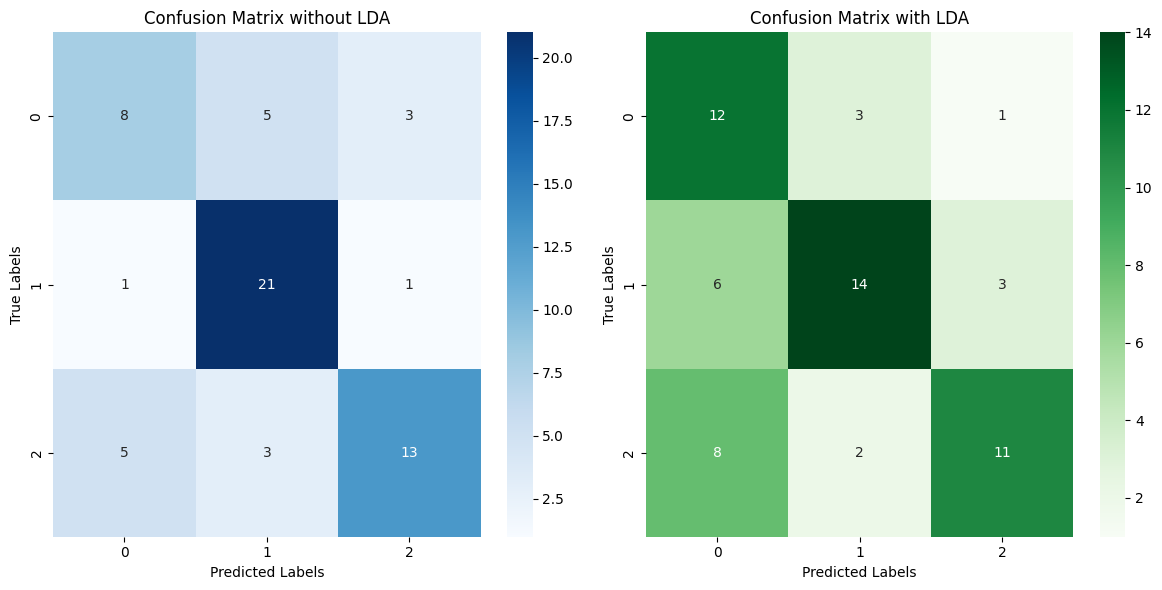

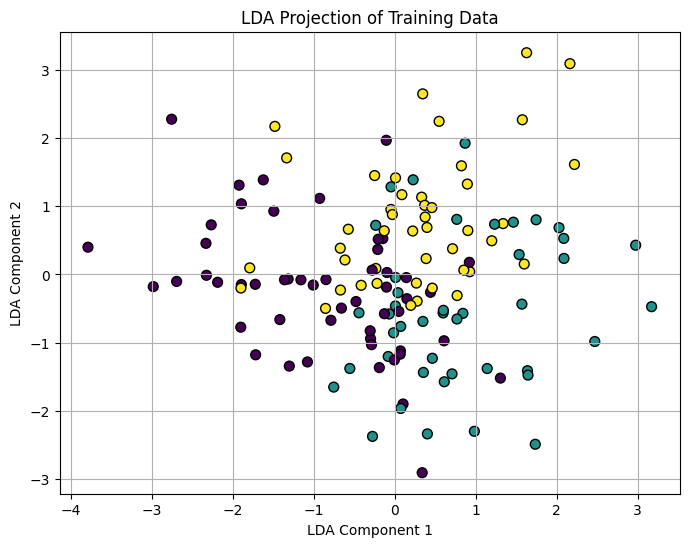

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=200, n_features=10, n_classes=3, n_informative=8, n_redundant=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree without LDA
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_no_lda = clf.predict(X_test)

# Accuracy without LDA
acc_no_lda = accuracy_score(y_test, y_pred_no_lda)

# Apply LDA
lda = LDA(n_components=2)  # Reduce to 2 components for visualization and classification
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Decision Tree with LDA
clf_lda = DecisionTreeClassifier(random_state=42)
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)

# Accuracy with LDA
acc_lda = accuracy_score(y_test, y_pred_lda)

# Print the accuracy results
print("Accuracy without LDA:", acc_no_lda)
print("Accuracy with LDA:", acc_lda)

# Confusion Matrix
conf_matrix_no_lda = confusion_matrix(y_test, y_pred_no_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

# Classification Report
print("\nClassification Report without LDA:")
print(classification_report(y_test, y_pred_no_lda))

print("\nClassification Report with LDA:")
print(classification_report(y_test, y_pred_lda))

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Without LDA Confusion Matrix
sns.heatmap(conf_matrix_no_lda, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix without LDA')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# With LDA Confusion Matrix
sns.heatmap(conf_matrix_lda, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix with LDA')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# Visualization of LDA-Transformed Data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50)
plt.title('LDA Projection of Training Data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.grid(True)
plt.show()


# Independent Component Analysis (ICA)

Silhouette Score without ICA: 0.4373
Silhouette Score with ICA: 0.5674


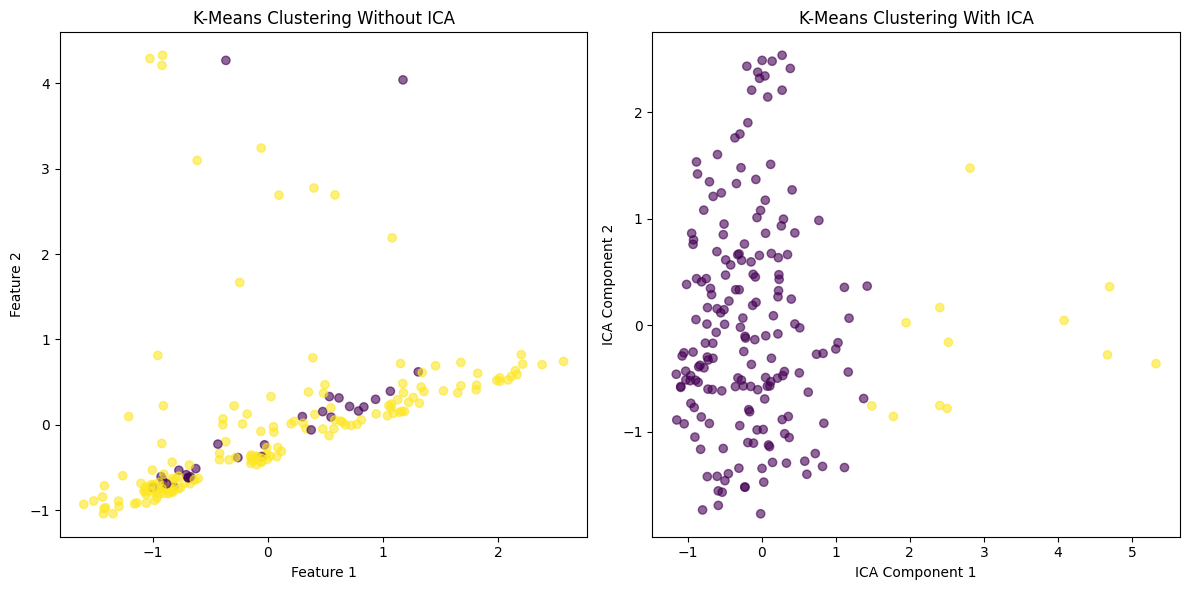

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the UCI Parkinson's dataset from a URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)


# Features (excluding 'name' and 'status')
X = data.drop(columns=['name', 'status'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering without ICA
kmeans_no_ica = KMeans(n_clusters=2, random_state=42)
kmeans_no_ica.fit(X_scaled)
labels_no_ica = kmeans_no_ica.labels_

# Evaluate clustering performance without ICA using Silhouette Score
silhouette_no_ica = silhouette_score(X_scaled, labels_no_ica)
print(f"Silhouette Score without ICA: {silhouette_no_ica:.4f}")

# Apply ICA to reduce dimensionality
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Apply K-Means clustering on ICA-transformed data
kmeans_ica = KMeans(n_clusters=2, random_state=42)
kmeans_ica.fit(X_ica)
labels_ica = kmeans_ica.labels_

# Evaluate clustering performance with ICA using Silhouette Score
silhouette_ica = silhouette_score(X_ica, labels_ica)
print(f"Silhouette Score with ICA: {silhouette_ica:.4f}")

# Visualizing the clusters before and after ICA (using the first two components)
plt.figure(figsize=(12, 6))

# Before ICA
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_no_ica, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering Without ICA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# After ICA
plt.subplot(1, 2, 2)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=labels_ica, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering With ICA")
plt.xlabel("ICA Component 1")
plt.ylabel("ICA Component 2")

plt.tight_layout()
plt.show()


# Class Assignment

Select a suitable dataset from the UCI Machine Learning Repository (except Parkinson's dataset). Implement various dimensionality reduction techniques (such as PCA, LDA, ICA) and apply Naive Bayes as the subsequent task. Determine which dimensionality reduction technique is the most effective for this dataset, and specify the optimal number of components for that technique.

Used Wine dataset

# Principal Component Analysis (PCA)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report

In [5]:
!pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

X = wine.data.features
y = wine.data.targets

X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
x_train,x_test = train_test_split(X,test_size=0.2,random_state=0)
y_train,y_test = train_test_split(y,test_size=0.2,random_state=0)

In [8]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [9]:
pca=PCA(n_components=2)
x_train_sc=pca.fit_transform(x_train_sc)
x_test_sc=pca.transform(x_test_sc)

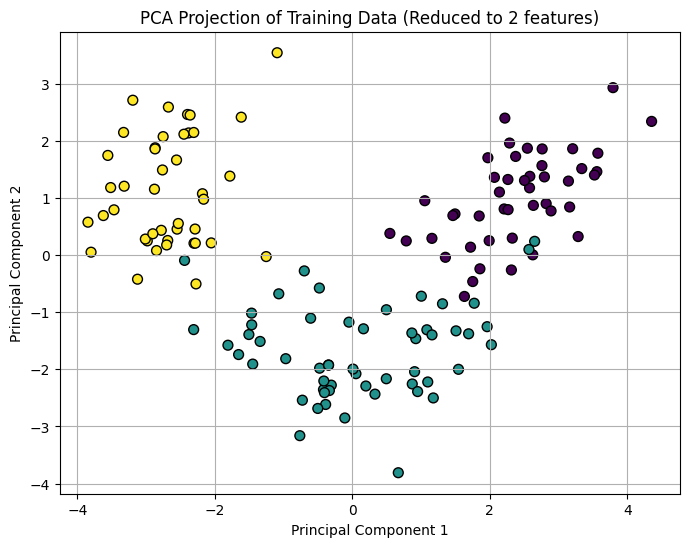

In [10]:

import numpy as np

plt.figure(figsize=(8, 6))
y_train_values = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)

if isinstance(y_train, pd.DataFrame) and 'class' in y_train.columns:
    y_train_values = y_train['class'].to_numpy()
else:

  y_train_values = [val for val in y_train_values if isinstance(val, (int, float, complex))]
y_train_values = y_train_values[:len(x_train_sc)]


plt.scatter(x_train_sc[:, 0], x_train_sc[:, 1], c=y_train_values, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA Projection of Training Data (Reduced to 2 features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [11]:
#Naive bayes before applying PCA
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

y_pred = nb_classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
#Naive bayes after applying PCA
nb_classifier_pca = GaussianNB()
nb_classifier_pca.fit(x_train_sc, y_train)

y_pred_pca = nb_classifier_pca.predict(x_test_sc)
cm_pca=confusion_matrix(y_test,y_pred_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


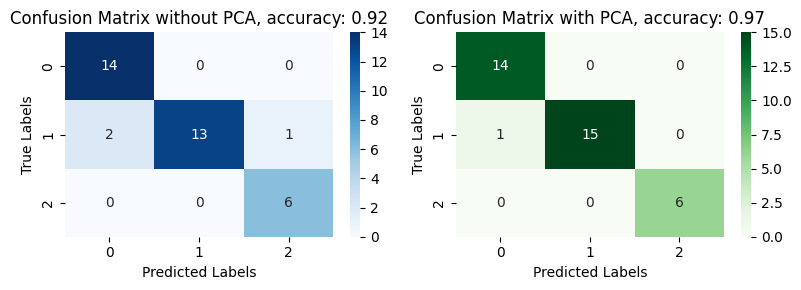

In [12]:

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# Without PCA Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title(f'Confusion Matrix without PCA, accuracy: {round(accuracy_score(y_test, y_pred),2)}')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# With PCA Confusion Matrix
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title(f'Confusion Matrix with PCA, accuracy: {round( accuracy_score(y_test, y_pred_pca),2)}')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

In [13]:
print('r2 score',r2_score(y_test,y_pred),'..........r2 score PCA',r2_score(y_test,y_pred_pca))
print('mse   ',mean_squared_error(y_test,y_pred),"..............mse PCA  ",mean_squared_error(y_test,y_pred_pca))

r2 score 0.8353658536585366 ..........r2 score PCA 0.9451219512195121
mse    0.08333333333333333 ..............mse PCA   0.027777777777777776


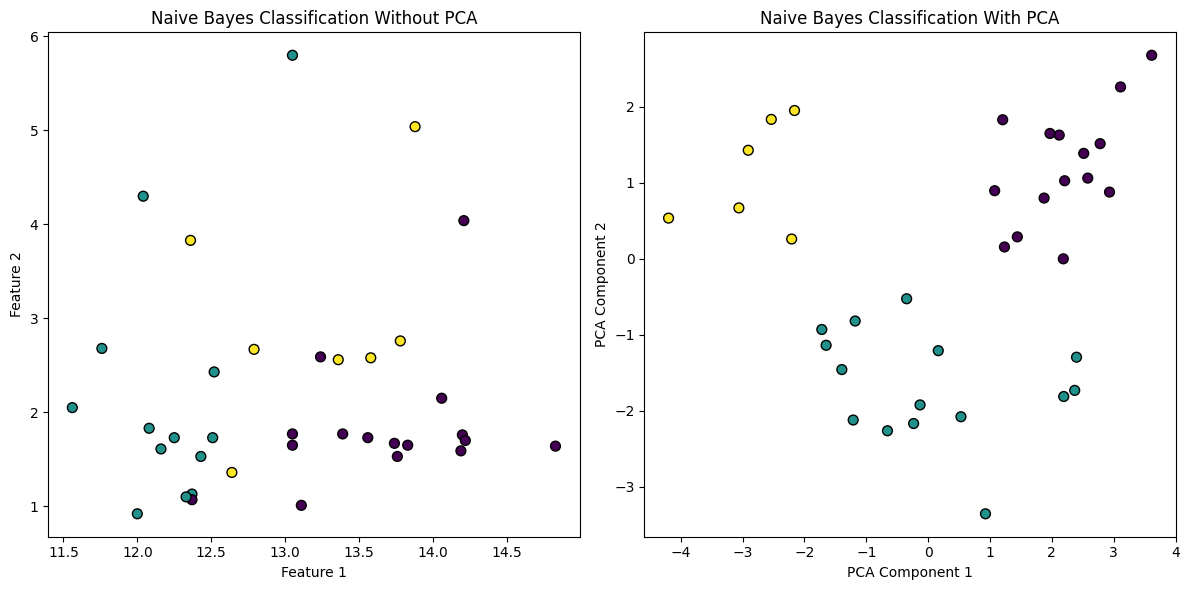

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_pred, cmap='viridis', edgecolors='k', s=50)
plt.title('Naive Bayes Classification Without PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(x_test_sc[:, 0], x_test_sc[:, 1], c=y_pred_pca, cmap='viridis', edgecolors='k', s=50)
plt.title('Naive Bayes Classification With PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


## Visualization on train and test data after applying PCA and doing bayesian classification

<ipython-input-15-56b263d160f2>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set_np == j, 0], X_set[y_set_np == j, 1],


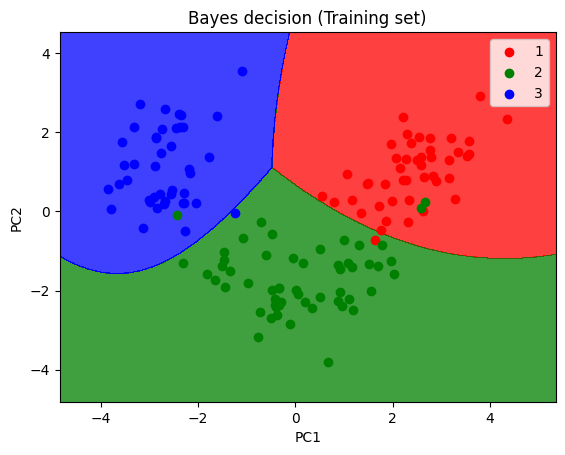

In [15]:
X_set, y_set = x_train_sc, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb_classifier_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):

    y_set_np = y_set.to_numpy().flatten()
    plt.scatter(X_set[y_set_np == j, 0], X_set[y_set_np == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Bayes decision (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<ipython-input-16-d367e55f318a>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set_np == j, 0], X_set[y_set_np == j, 1],


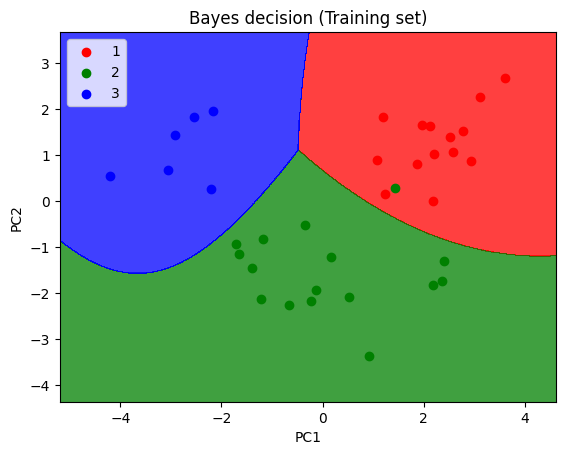

In [16]:
X_set, y_set = x_test_sc, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb_classifier_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):

    y_set_np = y_set.to_numpy().flatten()
    plt.scatter(X_set[y_set_np == j, 0], X_set[y_set_np == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Bayes decision (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Linear Discriminant Analysis (LDA)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix

Applying LDA

In [18]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [19]:
lda = LDA(n_components=2)
x_train_lda = lda.fit_transform(x_train_sc, y_train)
x_test_lda = lda.transform(x_test_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
#Naive bayes before applying PCA
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

y_pred = nb_classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
#Naive bayes after applying PCA
nb_classifier_lda = GaussianNB()
nb_classifier_lda.fit(x_train_lda, y_train)

y_pred_lda = nb_classifier_lda.predict(x_test_lda)
cm_lda=confusion_matrix(y_test,y_pred_lda)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
# Classification Report
print("\nClassification Report without LDA:")
print(classification_report(y_test, y_pred))

print("\nClassification Report with LDA:")
print(classification_report(y_test, y_pred_lda))


Classification Report without LDA:
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.81      0.90        16
           3       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36


Classification Report with LDA:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



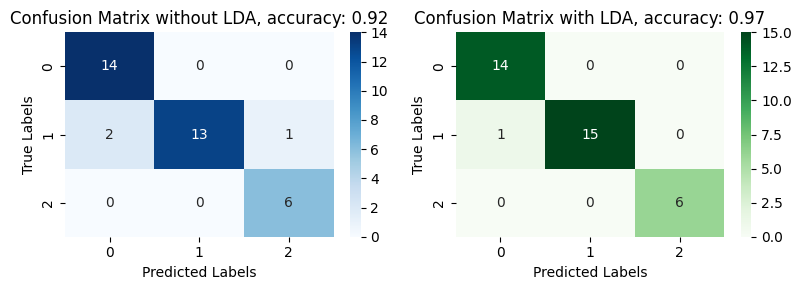

In [22]:

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# Without PCA Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title(f'Confusion Matrix without LDA, accuracy: {round(accuracy_score(y_test, y_pred),2)}')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# With PCA Confusion Matrix
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title(f'Confusion Matrix with LDA, accuracy: {round( accuracy_score(y_test, y_pred_lda),2)}')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

In [23]:
print('r2 score',r2_score(y_test,y_pred),'..........r2 score LDA',r2_score(y_test,y_pred_lda))
print('mse   ',mean_squared_error(y_test,y_pred),"..............mse LDA  ",mean_squared_error(y_test,y_pred_lda))

r2 score 0.8353658536585366 ..........r2 score LDA 0.9451219512195121
mse    0.08333333333333333 ..............mse LDA   0.027777777777777776


<ipython-input-24-2c9d9a3a8135>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set_np == j, 0], X_set[y_set_np == j, 1],


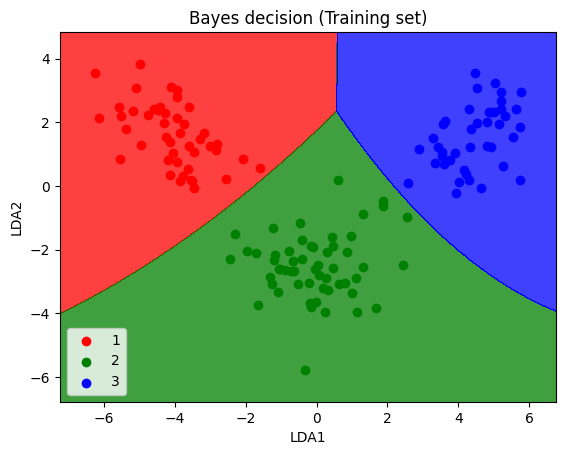

<ipython-input-24-2c9d9a3a8135>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set_np == j, 0], X_set[y_set_np == j, 1],


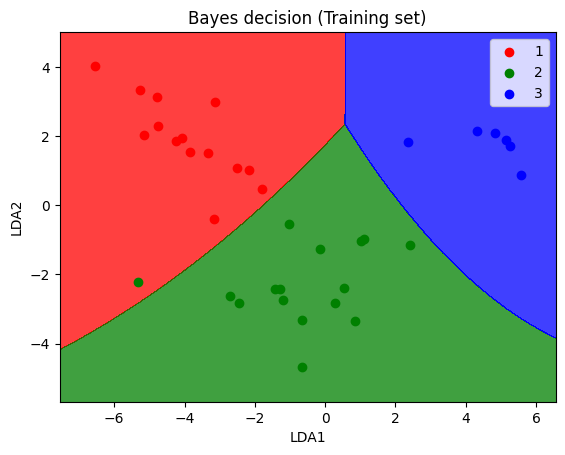

In [24]:
# Visualization on train and test data after applying LDA and doing bayesian classification
X_set, y_set = x_train_lda, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb_classifier_lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):

    y_set_np = y_set.to_numpy().flatten()
    plt.scatter(X_set[y_set_np == j, 0], X_set[y_set_np == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Bayes decision (Training set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()
plt.show()
X_set, y_set = x_test_lda, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb_classifier_lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):

    y_set_np = y_set.to_numpy().flatten()
    plt.scatter(X_set[y_set_np == j, 0], X_set[y_set_np == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Bayes decision (Training set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()
plt.show()

# Independent Component Analysis (ICA)

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [26]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [27]:
ica =FastICA(n_components=2, random_state=0)
x_train_ica = ica.fit_transform(x_train_sc)
x_test_ica = ica.transform(x_test_sc)

In [28]:
#Naive bayes before applying PCA
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

y_pred = nb_classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
#Naive bayes after applying PCA
nb_classifier_ica = GaussianNB()
nb_classifier_ica.fit(x_train_ica, y_train)

y_pred_ica = nb_classifier_ica.predict(x_test_ica)
cm_lda=confusion_matrix(y_test,y_pred_ica)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# Classification Report
print("\nClassification Report without LDA:")
print(classification_report(y_test, y_pred))

print("\nClassification Report with LDA:")
print(classification_report(y_test, y_pred_ica))


Classification Report without LDA:
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.81      0.90        16
           3       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36


Classification Report with LDA:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



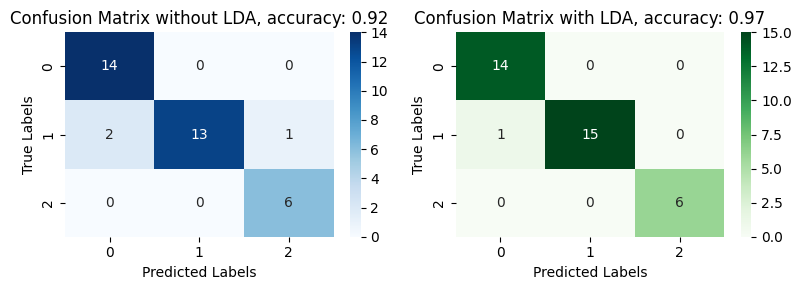

In [30]:

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# Without PCA Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title(f'Confusion Matrix without LDA, accuracy: {round(accuracy_score(y_test, y_pred),2)}')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# With PCA Confusion Matrix
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title(f'Confusion Matrix with LDA, accuracy: {round( accuracy_score(y_test, y_pred_ica),2)}')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

In [31]:
print('r2 score',r2_score(y_test,y_pred),'..........r2 score ICA',r2_score(y_test,y_pred_ica))
print('mse   ',mean_squared_error(y_test,y_pred),"..............mse ICA  ",mean_squared_error(y_test,y_pred_ica))

r2 score 0.8353658536585366 ..........r2 score ICA 0.9451219512195121
mse    0.08333333333333333 ..............mse ICA   0.027777777777777776


<ipython-input-32-bfa16dc35e8c>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set_np == j, 0], X_set[y_set_np == j, 1],


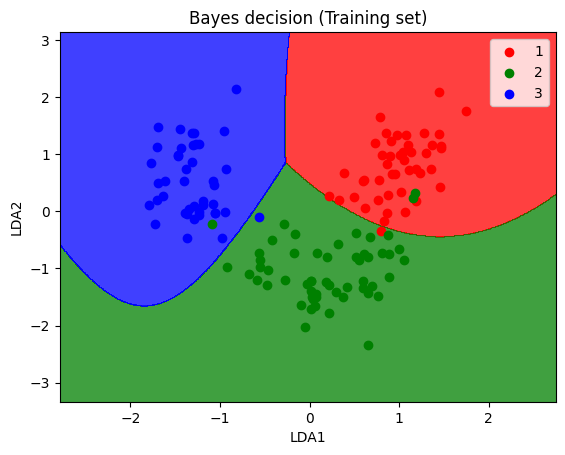

<ipython-input-32-bfa16dc35e8c>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set_np == j, 0], X_set[y_set_np == j, 1],


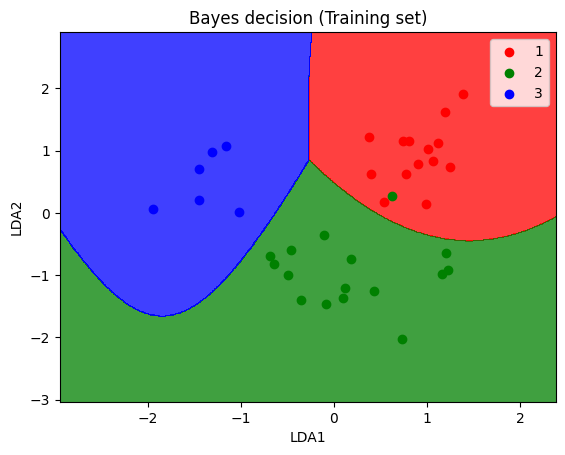

In [32]:
# Visualization on train and test data after applying LDA and doing bayesian classification
X_set, y_set = x_train_ica, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb_classifier_ica.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):

    y_set_np = y_set.to_numpy().flatten()
    plt.scatter(X_set[y_set_np == j, 0], X_set[y_set_np == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Bayes decision (Training set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()
plt.show()
X_set, y_set = x_test_ica, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb_classifier_ica.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):

    y_set_np = y_set.to_numpy().flatten()
    plt.scatter(X_set[y_set_np == j, 0], X_set[y_set_np == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Bayes decision (Training set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()
plt.show()

# Comparision on selecting diffrent no of parametrs for PCA,LDA and ICA

#Analysis

In [33]:
pca_accuracies = {}
lda_accuracies = {}
ica_accuracies = {}


# PCA Analysis
for n_components in range(1, min(x_train_sc.shape[1], x_train_sc.shape[0]) + 1):
    pca = PCA(n_components=n_components)
    x_train_pca = pca.fit_transform(x_train_sc)
    x_test_pca = pca.transform(x_test_sc)
    nb_classifier_pca = GaussianNB()
    nb_classifier_pca.fit(x_train_pca, y_train)
    y_pred_pca = nb_classifier_pca.predict(x_test_pca)
    pca_accuracies[n_components] = accuracy_score(y_test, y_pred_pca)
    print(f"PCA with {n_components} components: Accuracy = {pca_accuracies[n_components]}")

# LDA Analysis

for n_components in range(1, min(len(np.unique(y_train)), x_train_sc.shape[1]) ): #Remove +1 from here
    lda = LDA(n_components=n_components)
    x_train_lda = lda.fit_transform(x_train_sc, y_train)
    x_test_lda = lda.transform(x_test_sc)
    nb_classifier_lda = GaussianNB()
    nb_classifier_lda.fit(x_train_lda, y_train)
    y_pred_lda = nb_classifier_lda.predict(x_test_lda)
    lda_accuracies[n_components] = accuracy_score(y_test, y_pred_lda)
    print(f"LDA with {n_components} components: Accuracy = {lda_accuracies[n_components]}")

# ICA Analysis
for n_components in range(1, min(x_train_sc.shape[1], x_train_sc.shape[0]) + 1):
    ica = FastICA(n_components=n_components, random_state=0)
    x_train_ica = ica.fit_transform(x_train_sc)
    x_test_ica = ica.transform(x_test_sc)
    nb_classifier_ica = GaussianNB()
    nb_classifier_ica.fit(x_train_ica, y_train)
    y_pred_ica = nb_classifier_ica.predict(x_test_ica)
    ica_accuracies[n_components] = accuracy_score(y_test, y_pred_ica)
    print(f"ICA with {n_components} components: Accuracy = {ica_accuracies[n_components]}")



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

PCA with 1 components: Accuracy = 0.75
PCA with 2 components: Accuracy = 0.9722222222222222
PCA with 3 components: Accuracy = 1.0
PCA with 4 components: Accuracy = 1.0
PCA with 5 components: Accuracy = 1.0
PCA with 6 components: Accuracy = 1.0
PCA with 7 components: Accuracy = 1.0
PCA with 8 components: Accuracy = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

PCA with 9 components: Accuracy = 1.0
PCA with 10 components: Accuracy = 1.0
PCA with 11 components: Accuracy = 1.0
PCA with 12 components: Accuracy = 1.0
PCA with 13 components: Accuracy = 1.0
LDA with 1 components: Accuracy = 0.8333333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

LDA with 2 components: Accuracy = 0.9722222222222222
ICA with 1 components: Accuracy = 0.75
ICA with 2 components: Accuracy = 0.9722222222222222
ICA with 3 components: Accuracy = 0.9722222222222222
ICA with 4 components: Accuracy = 0.9444444444444444


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ICA with 5 components: Accuracy = 0.9722222222222222
ICA with 6 components: Accuracy = 0.9444444444444444
ICA with 7 components: Accuracy = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ICA with 8 components: Accuracy = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ICA with 9 components: Accuracy = 0.9444444444444444
ICA with 10 components: Accuracy = 0.9166666666666666
ICA with 11 components: Accuracy = 0.9166666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ICA with 12 components: Accuracy = 0.8888888888888888
ICA with 13 components: Accuracy = 0.9166666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**plot accuray vs compenent**

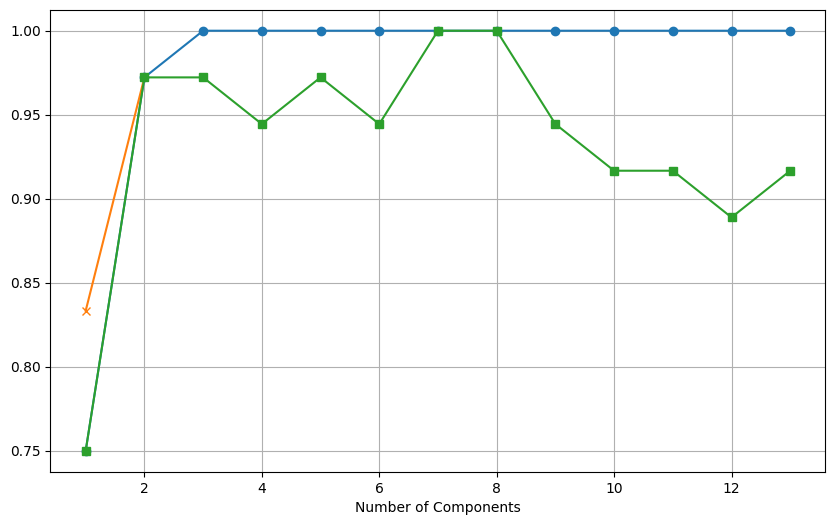

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(list(pca_accuracies.keys()), list(pca_accuracies.values()), label='PCA', marker='o')
plt.plot(list(lda_accuracies.keys()), list(lda_accuracies.values()), label='LDA', marker='x')
plt.plot(list(ica_accuracies.keys()), list(ica_accuracies.values()), label='ICA', marker='s')
plt.xlabel('Number of Components')

plt.grid(True)
plt.show()


1. LDA seems to achieve the highest accuracy with the optimal number of components for the Wine dataset. The accuracy generally increases with a small number of components and then starts to plateau or even slightly decrease with further increases in components.


2. PCA shows relatively good performance as well. The accuracy starts increasing with more components but then levels off.

3. ICA accuracy is lower compared to LDA and PCA. There is a variation with the components and some unstable behavior.

 Optimal Number of Components:
- From the graphs, LDA achieves the highest accuracy with 2 components.
- For PCA, it's recommended to use 2 components.

Overall:

LDA appears to be the most suitable dimensionality reduction technique for the Wine dataset when used with a Naive Bayes classifier, as it generally yields the highest accuracy and also better accuracy in our case than PCA and ICA.  The optimal number of components for LDA appears to be 2.


